<a href="https://colab.research.google.com/github/anastasiia-vsk/comp_data_viz_sys/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_%D0%9F%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практична робота 7. Аналіз даних даних і візуалізація Pyspark

In [1]:
# !pip install pyspark
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import asc, desc

In [2]:
spark = SparkSession.builder.master("local[*]").appName("Lab7").getOrCreate()

#### Датасет
Amazon Top 50 Bestselling Books 2009 – 2019 – https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

1. Прочитайте CSV файл spark.read.csv()

In [3]:
df = spark.read.csv("/content/bestsellers with categories.csv", header=True, inferSchema=True)
df.show(10)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

2. Вивести схему даних за допомогою PrintSchema.

In [4]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



3. Вивести назви стовпців і типи даних за допомогою dtypes


In [5]:
df.dtypes

[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

4. Виведіть перші п'ять рядків (використовується метод head)

In [6]:
df.head(5)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

In [7]:
for row in df.head(5):
    print(row)

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')
Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction')
Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction')
Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction')
Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')


In [8]:
# можливо Ви мали на увазі такий варіант:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



5. Вивести перший рядок за допомогою first()

In [9]:
df.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

6. Зробіть опис датасету за допомогою describe()


In [10]:
df.describe().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                NULL|            NULL|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       NULL|
| stddev|                NULL|            NULL|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       NULL|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

7. Виведіть список стовпців за допомогою columns()

In [11]:
df.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

8. Виведіть загальну кількість рядків даних за допомогою count()

In [12]:
df.count()

550

9. Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить
їх на NaN, потім тип даних на числовий.

In [13]:
dict_missing = {col:df.filter(df[col].isNull()).count() for col in df.columns}
dict_missing

{'Name': 0,
 'Author': 0,
 'User Rating': 0,
 'Reviews': 0,
 'Price': 0,
 'Year': 0,
 'Genre': 0}

> немає пропущених значень

10. Замініть комірки з пропущеними значенями на середні за стовпцем. І
тип даних на float.

> немає пропущених значень

Про скільки книг зберігає дані датасет?

In [14]:
unique_books = [row.Name for row in df.select("Name").distinct().collect()]
unique_books[0:5]

['The Legend of Zelda: Hyrule Historia',
 'The Paris Wife: A Novel',
 'The Wonderful Things You Will Be',
 'Eat This, Not That! Thousands of Simple Food Swaps that Can Save You 10, 20, 30 Pounds--or More!',
 'The Immortal Life of Henrietta Lacks']

In [15]:
print("Кількість книг у датасеті:", len(unique_books))

Кількість книг у датасеті: 351


Інакший спосіб, через видалення дублікатів:

In [16]:
books_count = df.select("Name").dropDuplicates().count()
print("Кількість книг у датасеті:", books_count)

Кількість книг у датасеті: 351


11. Змініть назви всіх колонок: назва з маленької букви, без пробілів через
підкреслення.
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [17]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



12. Знайдіть автора з найвищим рейтингом.

In [18]:
author_with_max_rating = df.orderBy(desc("user_rating")).first()
print("Автор з найвищим рейтингом:", author_with_max_rating["author"],
      "\nРейтинг:", author_with_max_rating["user_rating"])

Автор з найвищим рейтингом: Bill Martin Jr. 
Рейтинг: 4.9


13. Знайдіть автора з найнижчим рейтингом.

In [19]:
author_with_min_rating = df.orderBy(asc("user_rating")).first()
print("Автор з найнижчим рейтингом:", author_with_min_rating["author"],
      "\nРейтинг:", author_with_min_rating["user_rating"])

Автор з найнижчим рейтингом: J.K. Rowling 
Рейтинг: 3.3


14. Знайдіть автора, що має найбільшу кількіть рецензій.

In [20]:
author_with_max_reviews = df.orderBy(desc("reviews")).first()
print("Автор з найбільшою кількістю рецензій:", author_with_max_reviews["author"],
      "\nКількість рецензій:", author_with_max_reviews["reviews"])

Автор з найбільшою кількістю рецензій: Delia Owens 
Кількість рецензій: 87841


15. Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з
найбільшим рейтингом).

In [21]:
top_10_books = df.orderBy(desc("user_rating")).limit(10).select("name", "user_rating")
top_10_books_pd = top_10_books.toPandas()
top_10_books_pd

,name,user_rating
0,Dog Man and Cat Kid: From the Creator of Capta...,4.9
1,Hamilton: The Revolution,4.9
2,Dog Man: A Tale of Two Kitties: From the Creat...,4.9
3,"Brown Bear, Brown Bear, What Do You See?",4.9
4,Dog Man: Brawl of the Wild: From the Creator o...,4.9
5,Dog Man: For Whom the Ball Rolls: From the Cre...,4.9
6,Dog Man: Lord of the Fleas: From the Creator o...,4.9
7,"Brown Bear, Brown Bear, What Do You See?",4.9
8,"Goodnight, Goodnight Construction Site (Hardco...",4.9
9,Dog Man: Fetch-22: From the Creator of Captain...,4.9


Бачимо, що у нас топ-10 книг з однаковим рейтингом

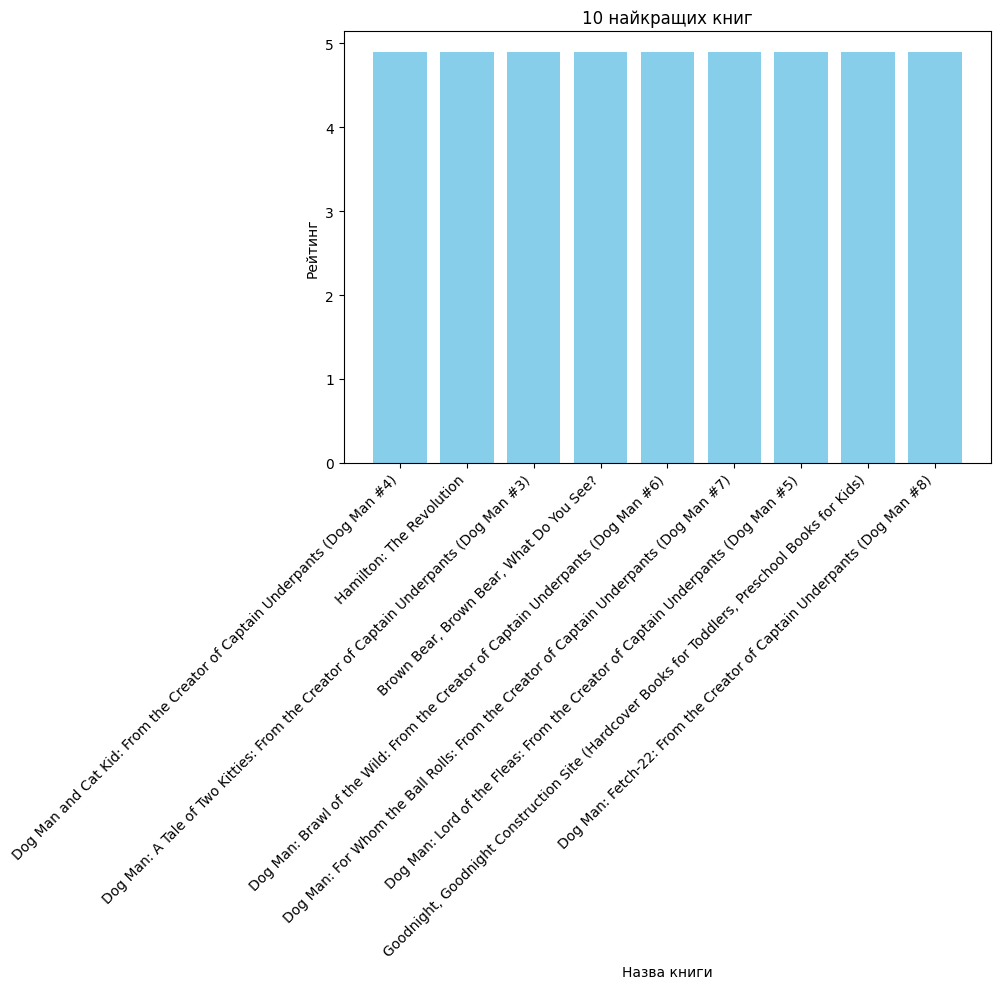

In [22]:
plt.figure(figsize=(10, 10))
plt.bar(top_10_books_pd["name"], top_10_books_pd["user_rating"], color='skyblue')
plt.xlabel('Назва книги')
plt.ylabel('Рейтинг')
plt.title('10 найкращих книг')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

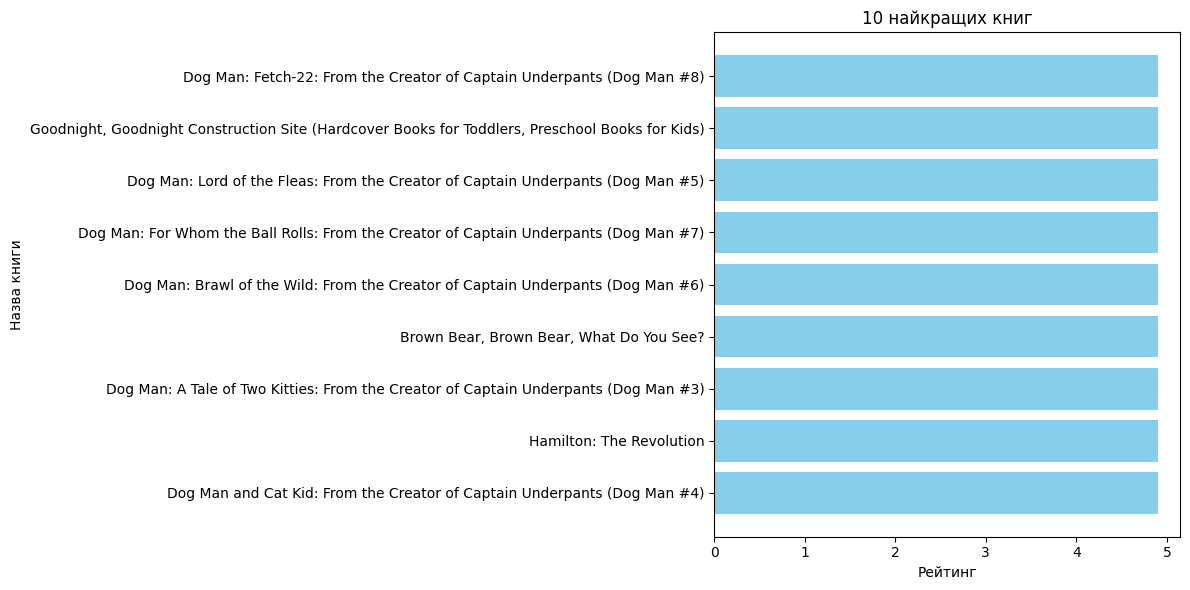

In [23]:
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_books_pd["name"], top_10_books_pd["user_rating"], color='skyblue')
plt.ylabel('Назва книги')
plt.xlabel('Рейтинг')
plt.title('10 найкращих книг')
plt.tight_layout()
plt.show()

16. Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews',
'price'.

In [24]:
selected_data = df.select(['user_rating', 'reviews', 'price'])

In [25]:
print("Кореляція між 'user_rating' та 'reviews':", selected_data.stat.corr("user_rating", "reviews"))

print(f"Кореляція між 'user_rating' та 'price':", selected_data.stat.corr("user_rating", "price"))

print(f"Кореляція між 'reviews' та 'price':", selected_data.stat.corr("reviews", "price"))

Кореляція між 'user_rating' та 'reviews': -0.0017290142555487738
Кореляція між 'user_rating' та 'price': -0.13308628728088093
Кореляція між 'reviews' та 'price': -0.10918188342780513


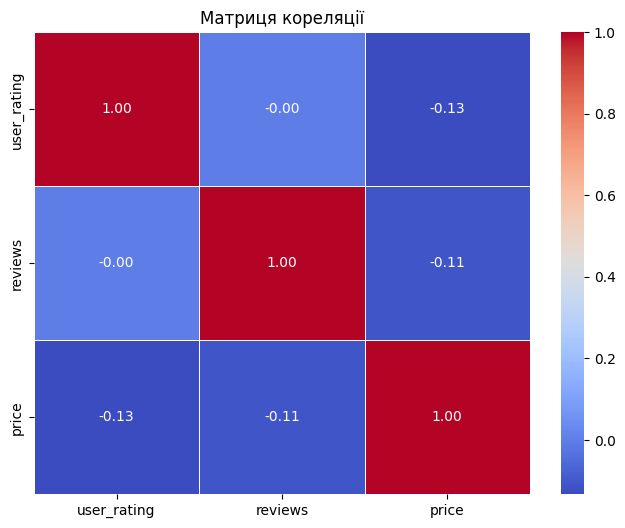

In [26]:
correlation_matrix_pd = selected_data.toPandas()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pd.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матриця кореляції')
plt.show()